In [ ]:
# Tipos de datos faltantes
  # MCAR (missing completely at random) => Elimando filas o columnas
  # MAR (Missing at random) => Imputacion de los datos
  # MNAR (missing not at ramdom) => Encontrando mas datos

In [ ]:
# Tipos de imputacion
  # Imputacion Univariante (imputacion media)
  # Imputacion Multivariada
  # Imputacion Unica
  # Imputaciones Numerosas

# Como superar los problemas generados por mis datos faltantes en un dataset

In [1]:
# Datos y modulos
import numpy as np
import scipy
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Salary_data_analysis_gender.csv")

# Mostremos algo de informacion
print("Dimension del dataset : ", dataset.shape)
print("*"*100)
print(dataset.dtypes)

Dimension del dataset :  (6704, 6)
****************************************************************************************************
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [2]:
# Datos faltantes
dataset.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [3]:
# Juntemos los valores nulos con los tipos de dato para cada columna
pd.concat([dataset.dtypes, dataset.isnull().sum()], axis = 1, keys =["Tipo", "Num_Faltantes"])

,Tipo,Num_Faltantes
Age,float64,2
Gender,object,2
Education Level,object,3
Job Title,object,2
Years of Experience,float64,3
Salary,float64,5


<Axes: >

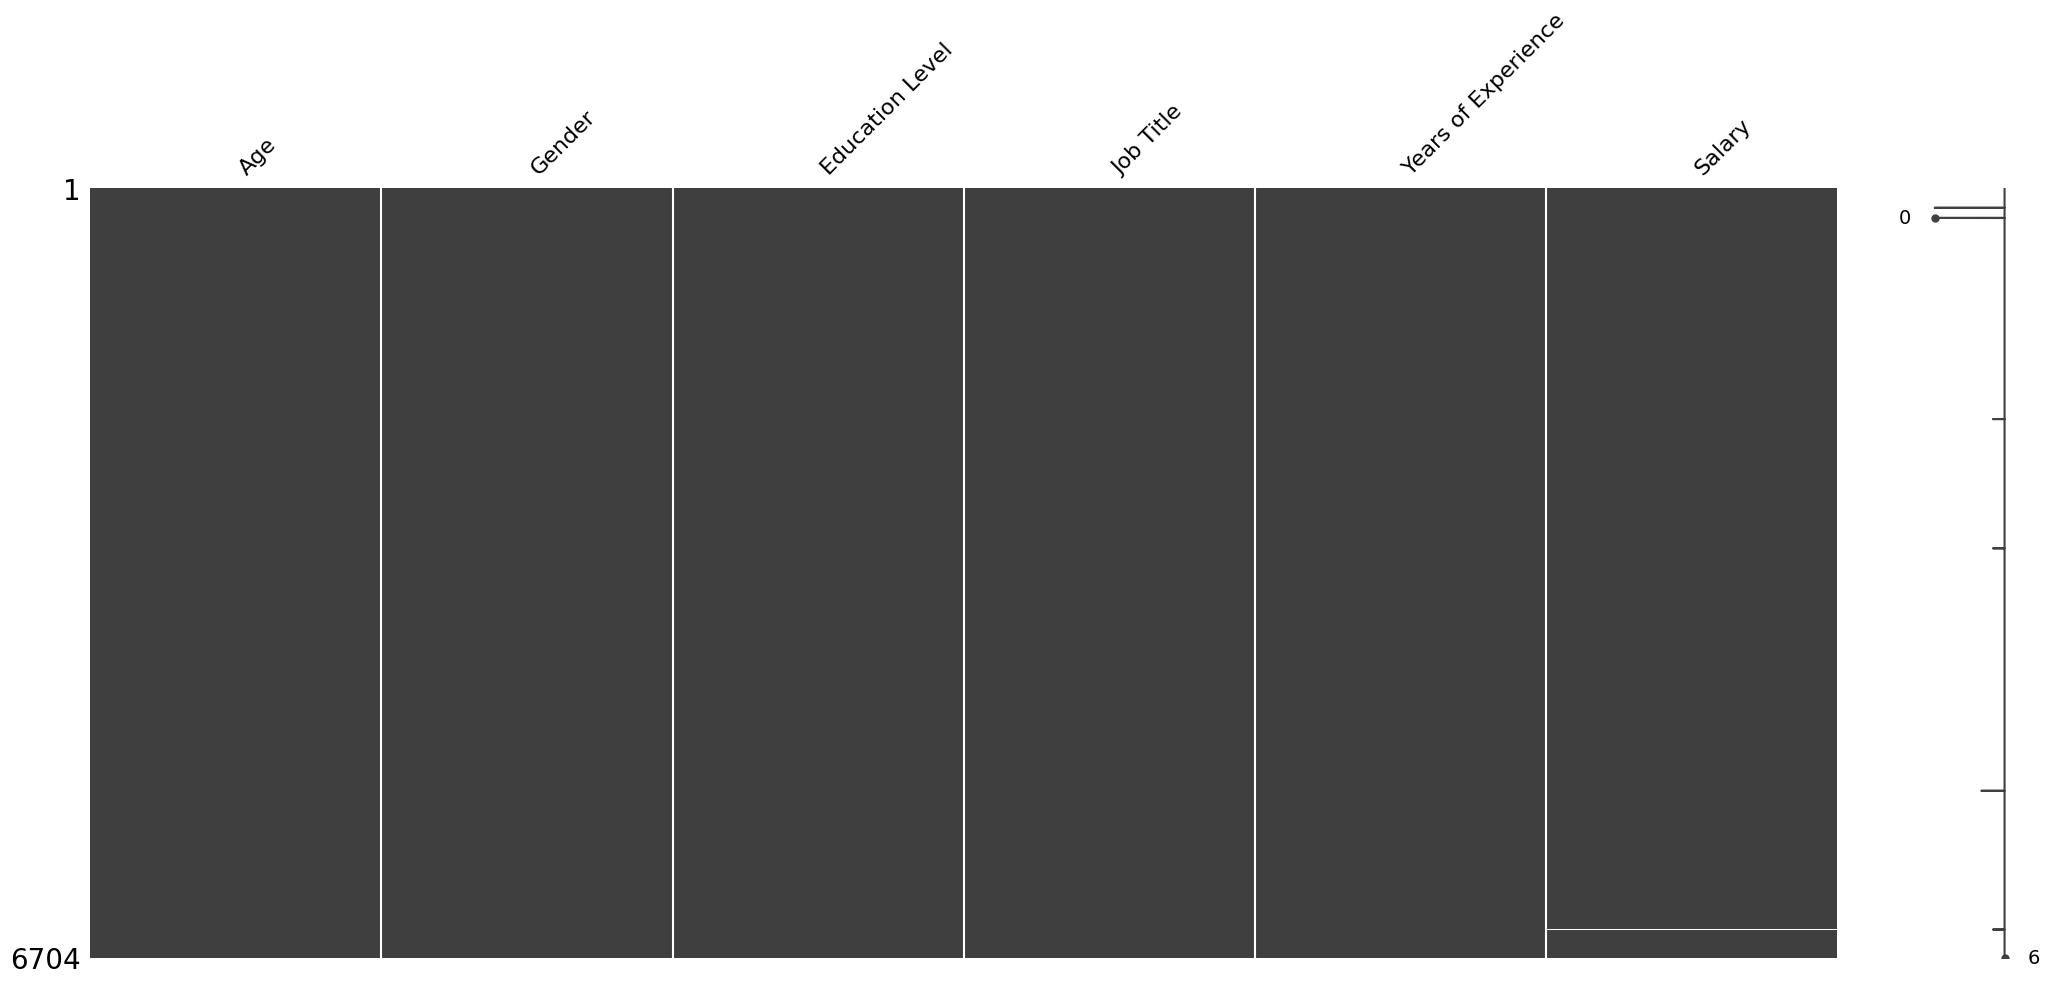

In [4]:
# Módulo missingno
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(dataset)

<Axes: >

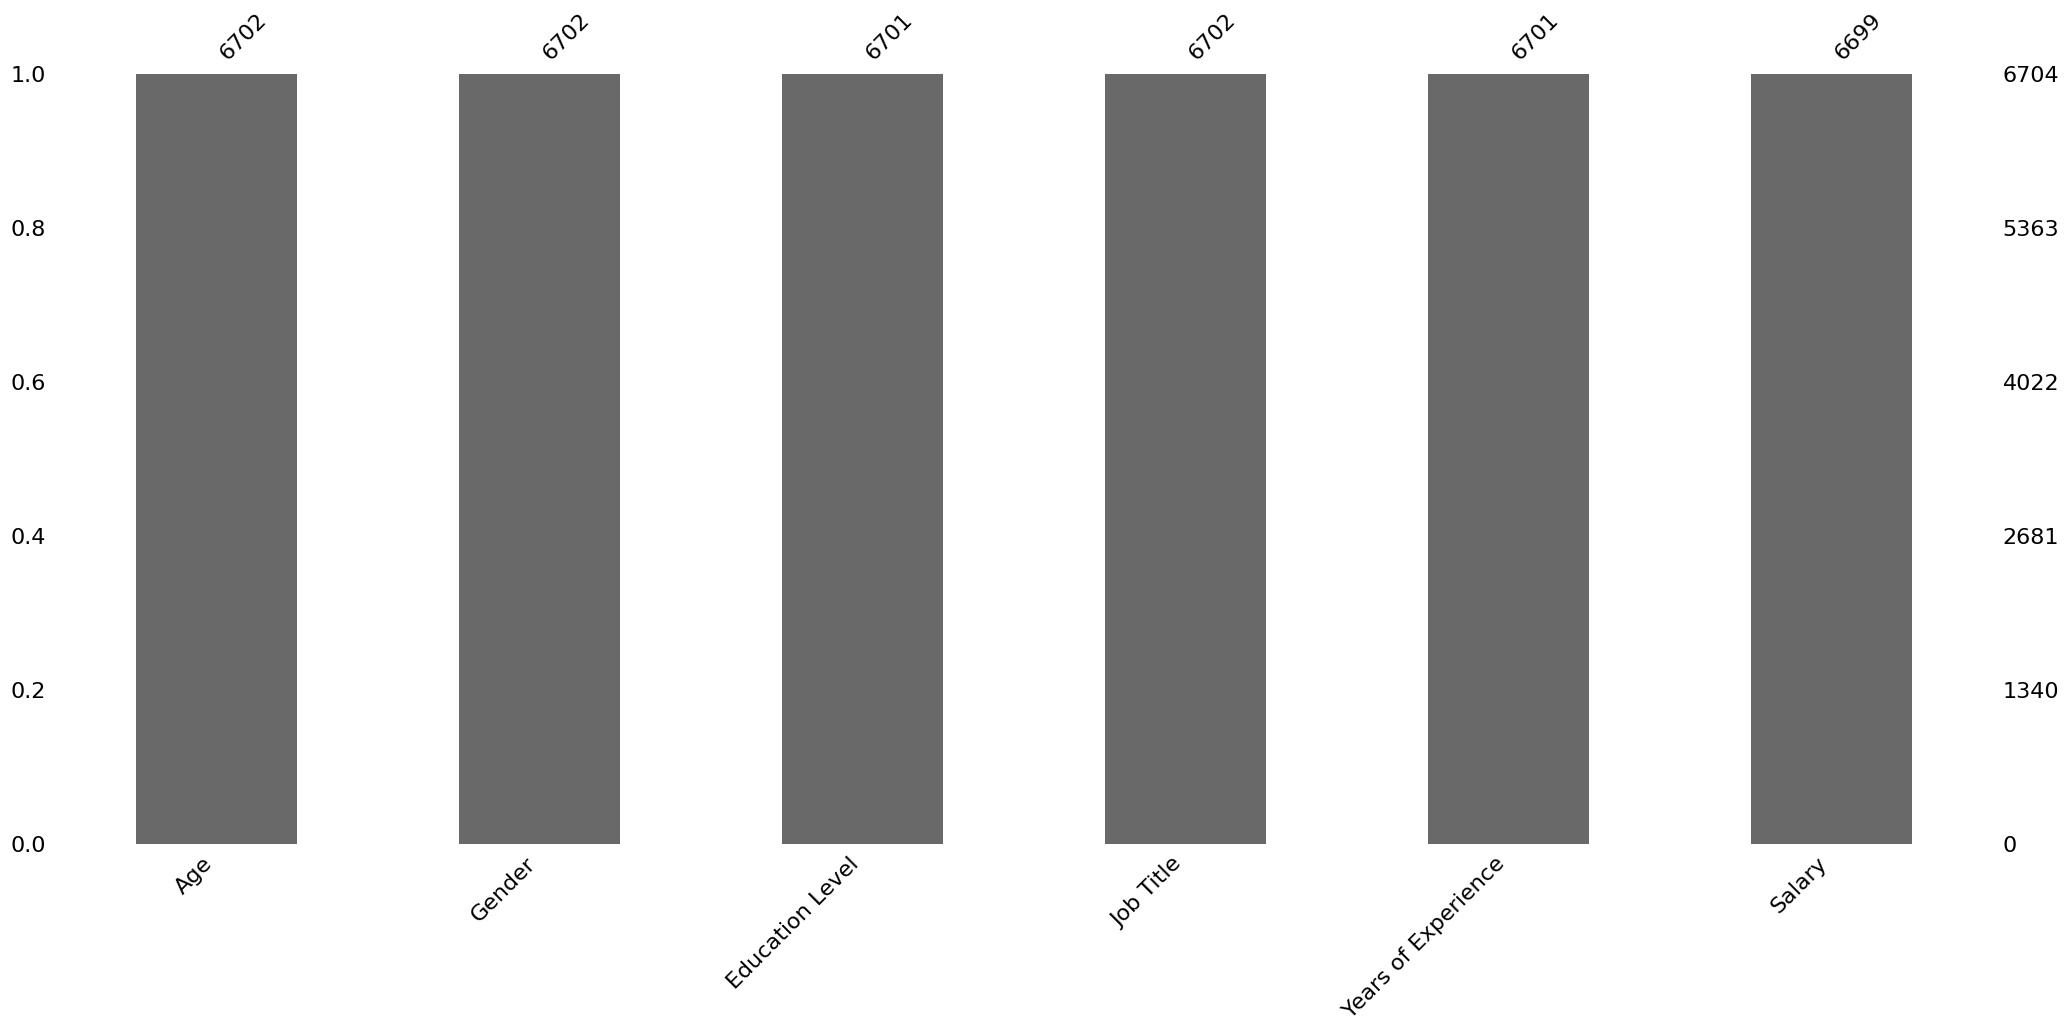

In [5]:
# Diagrama de barras
msno.bar(dataset)

## Imputando

In [6]:
# Sigamos la siguiente estrategia para imputar los valores faltantes
dataset["Age"] = dataset["Age"].replace(np.nan, dataset["Age"].mean())
dataset["Years of Experience"] = dataset["Years of Experience"].replace(np.nan,dataset["Years of Experience"].median())
dataset["Salary"] = dataset["Salary"].replace(np.nan, dataset["Salary"].mean())
dataset["Gender"] = dataset["Gender"].replace(np.nan, dataset["Gender"].value_counts().index[0])
dataset["Education Level"] = dataset["Education Level"].replace(np.nan, dataset["Education Level"].value_counts().index[0])
dataset["Job Title"] = dataset["Job Title"].replace(np.nan, dataset["Job Title"].value_counts().index[0])


In [7]:
# Verifiquemos la no existencia de valores faltantes
pd.concat([dataset.dtypes, dataset.isnull().sum()], axis = 1, keys =["Tipo", "Num_Faltantes"])

,Tipo,Num_Faltantes
Age,float64,0
Gender,object,0
Education Level,object,0
Job Title,object,0
Years of Experience,float64,0
Salary,float64,0


In [8]:
# Otro metodo : LOCF (Ultima observacion trasladada)
tmp = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Salary_data_analysis_gender.csv")

# Verifiquemos que la columna Age tiene valores faltantes
print("Numero de valores faltantes de Age es : " , tmp["Age"].isnull().sum())

# Encontremos los indices donde se encuentran esos valores faltantes
index = tmp["Age"].index[tmp["Age"].apply(np.isnan)]
print("\nIndices de los valores faltantes ", index)

# Concatenamos porciones de Age donde esten estos valores faltantes
print("Valores Faltantes \n", pd.concat([tmp["Age"][167:176], tmp["Age"][258:265]]), "\n")

# Apliquemos fillna a la columna Age, pasando el valor ffill al argumento method
tmp["Age"] = tmp["Age"].fillna(method = "ffill")

# Concatenamos porciones de Age donde esten estos valores faltantes para mostrar que
# ya no existen valores faltantes
print("Sin Valores Faltantes \n", pd.concat([tmp["Age"][167:176], tmp["Age"][258:265]]), "\n")

Numero de valores faltantes de Age es :  2

Indices de los valores faltantes  Index([172, 260], dtype='int64')
Valores Faltantes 
 167    46.0
168    31.0
169    34.0
170    50.0
171    29.0
172     NaN
173    43.0
174    26.0
175    35.0
258    50.0
259    29.0
260     NaN
261    37.0
262    46.0
263    31.0
264    42.0
Name: Age, dtype: float64 

Sin Valores Faltantes 
 167    46.0
168    31.0
169    34.0
170    50.0
171    29.0
172    29.0
173    43.0
174    26.0
175    35.0
258    50.0
259    29.0
260    29.0
261    37.0
262    46.0
263    31.0
264    42.0
Name: Age, dtype: float64 



/tmp/ipykernel_33/3030824585.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tmp["Age"] = tmp["Age"].fillna(method = "ffill")


In [ ]:
# Observacion : El argumento method puede tener el valor de bfill

In [9]:
# Otro metodo : Interpolacion lineal
# Es el metodo de aproximar un valor faltante uniendo puntos en orden creciente a lo
# largo de una linea recta.

# Otro metodo : Metodo interpolante
tmp = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Salary_data_analysis_gender.csv")

# Verifiquemos que la columna Age tiene valores faltantes
print("Numero de valores faltantes de Age es : " , tmp["Age"].isnull().sum())

# Encontremos los indices donde se encuentran esos valores faltantes
index = tmp["Age"].index[tmp["Age"].apply(np.isnan)]
print("\nIndices de los valores faltantes ", index)

# Concatenamos porciones de Age donde esten estos valores faltantes
print("Valores Faltantes \n", pd.concat([tmp["Age"][167:176], tmp["Age"][258:265]]), "\n")

# Usaremos el metodo interpolate
tmp["Age"] = tmp["Age"].interpolate(method = "linear", limit_direction= "forward", axis = 0)

# Concatenamos porciones de Age donde esten estos valores faltantes para mostrar que
# ya no existen valores faltantes
print("Sin Valores Faltantes \n", pd.concat([tmp["Age"][167:176], tmp["Age"][258:265]]), "\n")

Numero de valores faltantes de Age es :  2

Indices de los valores faltantes  Index([172, 260], dtype='int64')
Valores Faltantes 
 167    46.0
168    31.0
169    34.0
170    50.0
171    29.0
172     NaN
173    43.0
174    26.0
175    35.0
258    50.0
259    29.0
260     NaN
261    37.0
262    46.0
263    31.0
264    42.0
Name: Age, dtype: float64 

Sin Valores Faltantes 
 167    46.0
168    31.0
169    34.0
170    50.0
171    29.0
172    36.0
173    43.0
174    26.0
175    35.0
258    50.0
259    29.0
260    33.0
261    37.0
262    46.0
263    31.0
264    42.0
Name: Age, dtype: float64 



In [10]:
# Otro metodo : Imputacion por KNN

# Carguemos nuestro dataset
tmp = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Salary_data_analysis_gender.csv")

# Variable de interes (imputar) : 'Education Level'
# Encontremos los indices donde la columna 'Education Level' tiene los valores faltantes
index = tmp["Education Level"].isnull().index[tmp["Education Level"].isnull() == True]
print("Indices de los valores faltantes ", index)

# Concatenamos porciones de "Education Level" donde esten estos valores faltantes
print("Valores Faltantes \n", pd.concat([tmp["Education Level"][167:176], tmp["Education Level"][258:265], tmp["Education Level"][2009:2013]]), "\n")

# Inputemos la variable cualitativa "Education Level"
# Almacenemos en un objeto la variable categorica y construyamos sus variables dummy (OneHotEncoding)
cat_variables = tmp[["Education Level"]]
cat_dummies = pd.get_dummies(cat_variables , drop_first =True)
cat_dummies.head()

Indices de los valores faltantes  Index([172, 260, 2011], dtype='int64')
Valores Faltantes 
 167                   PhD
168            Bachelor's
169              Master's
170              Master's
171            Bachelor's
172                   NaN
173            Bachelor's
174              Master's
175            Bachelor's
258                   PhD
259            Bachelor's
260                   NaN
261            Bachelor's
262                   PhD
263            Bachelor's
264            Bachelor's
2009                  PhD
2010    Bachelor's Degree
2011                  NaN
2012    Bachelor's Degree
Name: Education Level, dtype: object 



,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False


In [12]:
# Eliminemos la variable categorica y concatenemos la informacion que nos interesa
dataset = tmp.drop(["Education Level"], axis = 1)
dataset = pd.concat([dataset,cat_dummies], axis = 1)
dataset.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,32.0,Male,Software Engineer,5.0,90000.0,False,False,False,False,False,False
1,28.0,Female,Data Analyst,3.0,65000.0,False,False,True,False,False,False
2,45.0,Male,Senior Manager,15.0,150000.0,False,False,False,False,True,False
3,36.0,Female,Sales Associate,7.0,60000.0,False,False,False,False,False,False
4,52.0,Male,Director,20.0,200000.0,False,False,True,False,False,False


In [13]:
# Removamos las variables cualitativas
dataset = dataset.drop(["Gender", "Job Title"], axis = 1)
dataset.head()

,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,32.0,5.0,90000.0,False,False,False,False,False,False
1,28.0,3.0,65000.0,False,False,True,False,False,False
2,45.0,15.0,150000.0,False,False,False,False,True,False
3,36.0,7.0,60000.0,False,False,False,False,False,False
4,52.0,20.0,200000.0,False,False,True,False,False,False


In [14]:
# Escalemos los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
dataset.head()


,Age,Years of Experience,Salary,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,0.268293,0.147059,0.359103,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.088235,0.258963,0.0,0.0,1.0,0.0,0.0,0.0
2,0.585366,0.441176,0.599439,0.0,0.0,0.0,0.0,1.0,0.0
3,0.365854,0.205882,0.238935,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.588235,0.799720,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 3)
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns = dataset.columns )



In [16]:
dataset.isnull().sum().sum()

0